In [137]:
import pandas as pd

## Data Exploration

Variable of the Titanic datasets , such as:
Survived: Survival status (0 = No, 1 = Yes)
Pclass: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
Sex: Passenger's gender
Age: Passenger's age
SibSp: Number of siblings/spouses aboard
Parch: Number of parents/children aboard
Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [138]:
# Load the training and test datasets
train_df = pd.read_csv('Titanic_train.csv') 
test_df = pd.read_csv('Titanic_test.csv') 

In [139]:
# Add an identifier column to differentiate datasets
train_df['is_train'] = 1
test_df['is_train'] = 0


In [140]:
# Add a placeholder column for the target in test_data
test_df['Survived'] = -1  # Placeholder since test_df lacks 'Survived'


In [141]:
# Concatenate the datasets
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)


In [142]:
# Concatenate the datasets
df.shape

(1309, 13)

In [143]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_train
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,-1,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1305,1306,-1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
1306,1307,-1,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,1308,-1,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [144]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_train'],
      dtype='object')

In [145]:
#train_df.drop(columns=['PassengerId','Cabin'], axis=1,inplace=True)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  is_train     1309 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 133.1+ KB


In [147]:
df.nunique()

PassengerId    1309
Survived          3
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
is_train          2
dtype: int64

In [148]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,is_train
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,-0.058060,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672
std,378.020061,0.760044,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,-1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,-1.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [149]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
is_train          0
dtype: int64

In [151]:
# Percentage of missing values
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
is_train        0.000000
dtype: float64


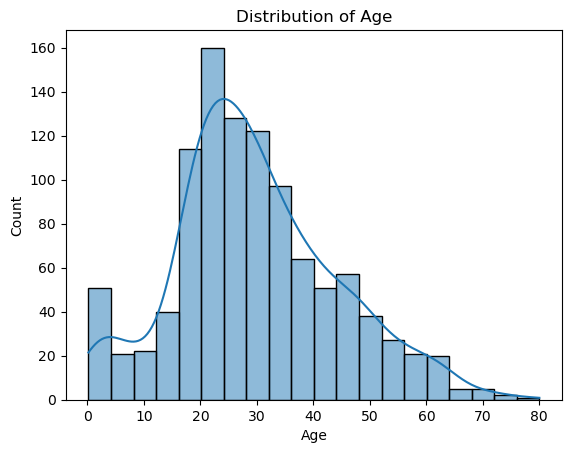

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of a numerical feature (e.g., Age)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.show()


In [153]:
# Unique values in categorical columns
print(df['Sex'].value_counts())
print(df['Embarked'].value_counts())

Sex
male      843
female    466
Name: count, dtype: int64
Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


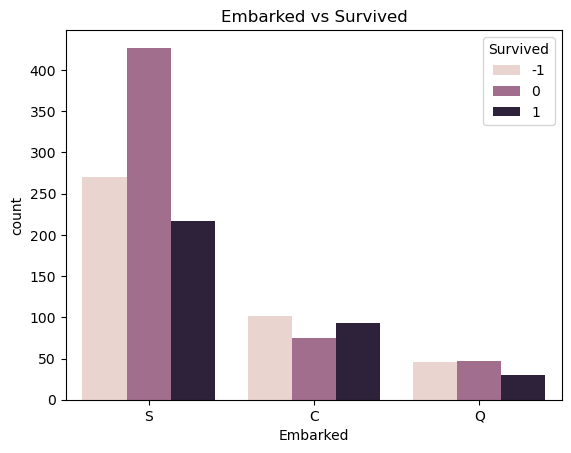

In [154]:
# Count plot for categorical feature
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Embarked vs Survived')
plt.show()

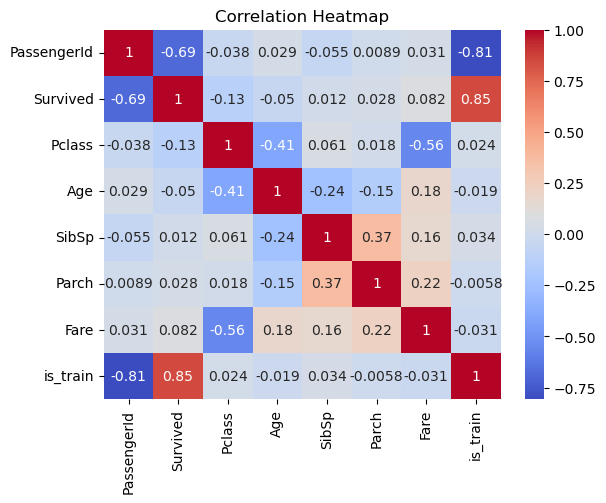

In [155]:
# Correlation heatmap
correlation_matrix = df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare' , 'is_train']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

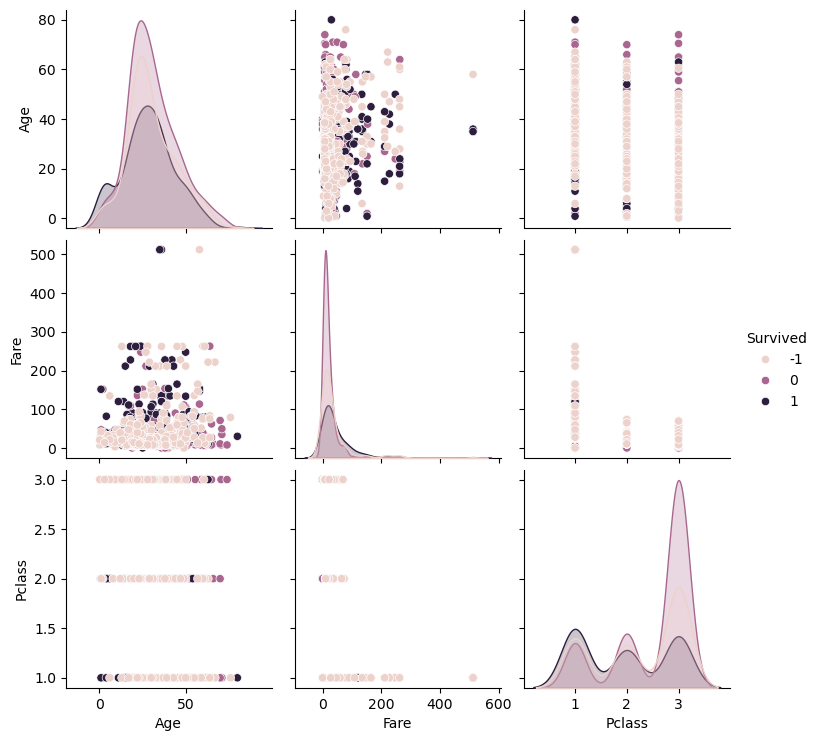

In [156]:
# Pairplot to examine relationships
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()


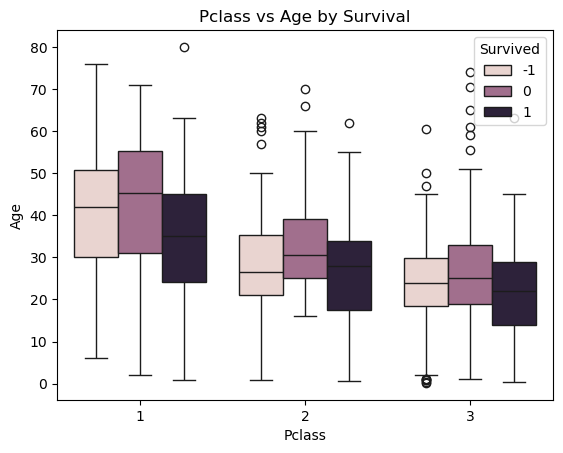

In [157]:
# Boxplot for numerical vs categorical
sns.boxplot(data=df, x='Pclass', y='Age', hue='Survived')
plt.title('Pclass vs Age by Survival')
plt.show()


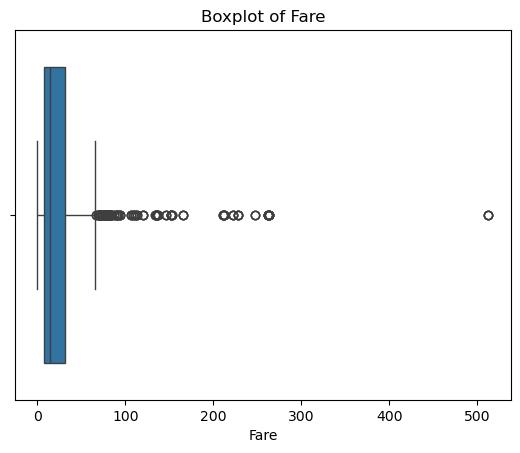

In [158]:
# Boxplot to detect outliers
sns.boxplot(data=df, x='Fare')
plt.title('Boxplot of Fare')
plt.show()


## Data Preprocessing

In [159]:
import warnings
warnings.filterwarnings('ignore')

In [160]:
df.duplicated().any()

False

In [161]:
df.drop(columns=['Cabin'], axis=1,inplace=True)

In [162]:
#  Handle missing values for train dataset
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Convert to integers
df['Age'] = df['Age'].astype(int)
df['Fare']=df['Fare'].astype(int)

# Verify conversion
print(df['Age'].dtype)
print(df['Fare'].dtype)

int32
int32


In [163]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_train
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,-1,3,"Spector, Mr. Woolf",male,28,0,0,A.5. 3236,8,S,0
1305,1306,-1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108,C,0
1306,1307,-1,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7,S,0
1307,1308,-1,3,"Ware, Mr. Frederick",male,28,0,0,359309,8,S,0


In [164]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ['Sex', 'Embarked']

# Apply Label Encoding to each column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print(f"Mapping for '{col}':", dict(zip(le.classes_, le.transform(le.classes_))))

print(df)


Mapping for 'Sex': {'female': 0, 'male': 1}
Mapping for 'Embarked': {'C': 0, 'Q': 1, 'S': 2, nan: 3}
      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305        -1       3   
1305         1306        -1       1   
1306         1307        -1       3   
1307         1308        -1       3   
1308         1309        -1       3   

                                                   Name  Sex  Age  SibSp  \
0                               Braund, Mr. Owen Harris    1   22      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...    0   38      1   
2                                Heikkinen, Miss. Laina    0   26      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   35      1   
4                              Allen, Mr. William 

In [165]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_train
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,-1,3,"Spector, Mr. Woolf",1,28,0,0,A.5. 3236,8,2,0
1305,1306,-1,1,"Oliva y Ocana, Dona. Fermina",0,39,0,0,PC 17758,108,0,0
1306,1307,-1,3,"Saether, Mr. Simon Sivertsen",1,38,0,0,SOTON/O.Q. 3101262,7,2,0
1307,1308,-1,3,"Ware, Mr. Frederick",1,28,0,0,359309,8,2,0


In [166]:
df.duplicated().sum()

0

## Model Building

In [167]:
# Split back into train_data and test_data
train_data = df[df['is_train'] == 1].drop(['is_train'], axis=1)
test_data = df[df['is_train'] == 0].drop(['is_train', 'Survived'], axis=1)

# Extract features and target
X = train_data.drop(['Survived','Name','Ticket','PassengerId'], axis=1)
y = train_data['Survived']


In [168]:
# Check class distribution
print("Class distribution in y_train:\n", y.value_counts())

Class distribution in y_train:
 Survived
0    549
1    342
Name: count, dtype: int64


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix


In [170]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [172]:
# Train the model
model = LogisticRegression(random_state=42)
model.fit(X, y)


LogisticRegression(random_state=42)

In [173]:
# Predict on the testing dataset
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

## Model Evaluation

In [174]:
# Make predictions
y_pred = model.predict(X_test)


In [175]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

print(f"Accuracy:{ accuracy:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")



Accuracy:0.81
Precision:0.81
Recall: 0.80
F1-Score: 0.80


In [176]:
# Make sure y_prob contains the positive class probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

print(f"ROC-AUC Score: {roc_auc:.2f}")


ROC-AUC Score: 0.88


In [177]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 10}


In [178]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
print(f"Cross-Validated ROC-AUC: {scores.mean():.2f}")


Cross-Validated ROC-AUC: 0.85


In [179]:
misclassified = X_test[(y_pred != y_test)]
print("Misclassified instances:\n", misclassified)


Misclassified instances:
      Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
709       3    1   28      1      1    15         0
621       1    1   42      1      0    52         2
447       1    1   34      0      0    26         2
673       2    1   31      0      0    13         2
396       3    0   31      0      0     7         2
793       1    1   28      0      0    30         0
235       3    0   28      0      0     7         2
204       3    1   18      0      0     8         2
23        1    1   28      0      0    35         2
362       3    0   45      0      1    14         0
772       2    0   57      0      0    10         2
312       2    0   26      1      1    26         2
767       3    0   30      0      0     7         1
357       2    0   38      0      0    13         2
165       3    1    9      0      2    20         2
712       1    1   48      1      0    52         2
338       3    1   45      0      0     8         2
286       3    1   30      0      0   

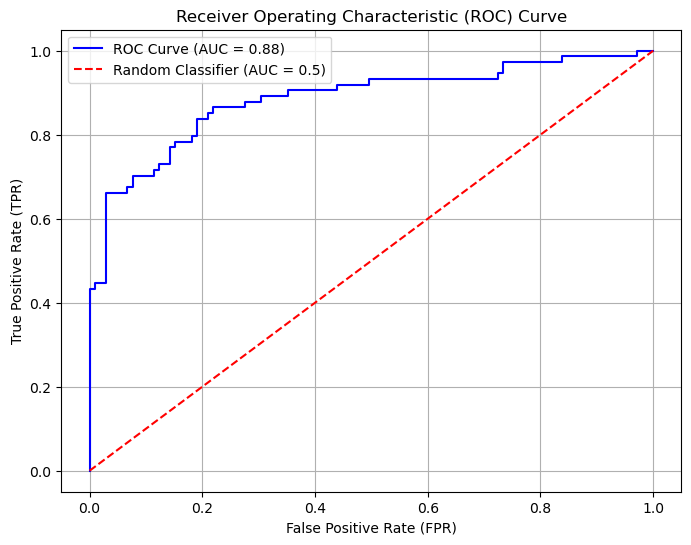

In [180]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)', color='red')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


## Interpretation

In [181]:
# Extract feature names and coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance:\n", feature_importance)


Feature Importance:
     Feature  Coefficient
5      Fare     0.002182
2       Age    -0.037973
4     Parch    -0.086151
6  Embarked    -0.208421
3     SibSp    -0.316504
0    Pclass    -1.051353
1       Sex    -2.632122


In [182]:
import numpy as np
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
significant_features = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("Most Significant Features:\n", significant_features)


Most Significant Features:
     Feature  Coefficient  Abs_Coefficient
1       Sex    -2.632122         2.632122
0    Pclass    -1.051353         1.051353
3     SibSp    -0.316504         0.316504
6  Embarked    -0.208421         0.208421
4     Parch    -0.086151         0.086151
2       Age    -0.037973         0.037973
5      Fare     0.002182         0.002182


## Deployment with Streamlit

In [183]:
#! pip install streamlit


In [184]:
import joblib

In [185]:
joblib.dump(model, 'titanic_model.pkl')

print("Model saved as 'titanic_model.pkl'.")

Model saved as 'titanic_model.pkl'.


## Interview Questions

##### 1. What is the difference between precision and recall?

##### 2. What is cross-validation, and why is it important in binary classification?


In [186]:
#end
